In [1]:
from __future__ import division
import sys
import random
import os
import networkx as nx
import util


def approx_markov_chain_steady_state(
    conditional_distribution, N_samples, iterations_between_samples
):
    """
    Computes the steady-state distribution by simulating running the Markov
    chain. Collects samples at regular intervals and returns the empirical
    distribution of the samples.

    Inputs
    ------
    conditional_distribution : A dictionary in which each key is an state,
                               and each value is a Distribution over other
                               states.

    N_samples : the desired number of samples for the approximate empirical
                distribution

    iterations_between_samples : how many jumps to perform between each collected
                                 sample

    Returns
    -------
    An empirical Distribution over the states that should approximate the
    steady-state distribution.
    """
    empirical_distribution = util.Distribution()

    # -------------------------------------------------------------------------
    # YOUR CODE GOES HERE FOR PART (a)
    states = list(conditional_distribution.keys())
    current_state = random.choice(states)
    for _ in range(N_samples * iterations_between_samples):
        # Decide whether to follow the original chain or move to a random state
        if random.random() < 0.9:
            # Follow the original chain's distribution
            current_state = conditional_distribution[current_state].sample()
        else:
            # Transition to a random state
            current_state = random.choice(states)

        # Collect a sample at specified intervals
        if _ % iterations_between_samples == 0:
            empirical_distribution[current_state] += 1
    empirical_distribution.normalize()
    # END OF YOUR CODE FOR PART (a)
    # -------------------------------------------------------------------------

    return empirical_distribution


def get_graph_distribution(filename):
    G = nx.read_gml(filename)
    d = nx.to_dict_of_dicts(G)
    cond_dist = util.Distribution(
        {
            k: util.Distribution({k_: v_["weight"] for k_, v_ in v.items()})
            for k, v in d.items()
        }
    )
    return cond_dist


def run_pagerank(data_filename, N_samples, iterations_between_samples):
    """
    Runs the PageRank algorithm, and returns the empirical
    distribution of the samples.

    Inputs
    ------
    data_filename : a file with the weighted directed graph on which to run the Markov Chain

    N_samples : the desired number of samples for the approximate empirical
                distribution

    iterations_between_samples : how many jumps to perform between each collected
                                 sample

    Returns
    -------
    An empirical Distribution over the states that should approximate the
    steady-state distribution.
    """
    conditional_distribution = get_graph_distribution(data_filename)

    steady_state = approx_markov_chain_steady_state(
        conditional_distribution, N_samples, iterations_between_samples
    )

    pages = conditional_distribution.keys()
    top = sorted((((steady_state[page]), page) for page in pages), reverse=True)

    values_to_show = min(20, len(steady_state))
    print("Top %d pages from empirical distribution:" % values_to_show)
    for i in range(0, values_to_show):
        print("%0.6f: %s" % top[i])
    return steady_state


In [3]:
def kl_divergence(dist1, dist2):
    """Calculate Kullback-Leibler Divergence between two distributions."""
    kl_div = 0
    for state in dist1:
        if state in dist2 and dist2[state] != 0:
            kl_div += dist1[state] * np.log(dist1[state] / dist2[state])
    return kl_div


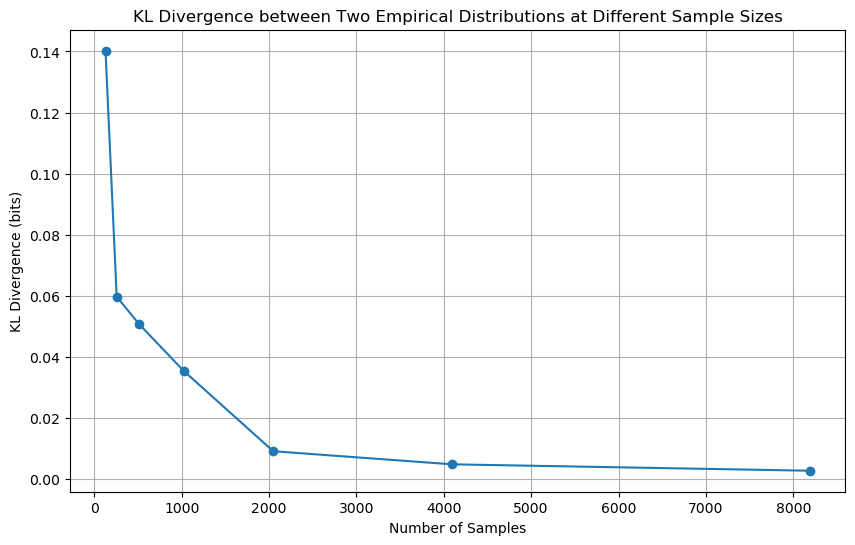

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data_filename = "example_data.gml"
N_samples = 2500
iterations_between_samples = 1000
# run_pagerank(data_filename, N_samples, iterations_between_samples)
sample_sizes = [128, 256, 512, 1024, 2048, 4096, 8192]
divergences = []
conditional_distribution = get_graph_distribution(data_filename)
for N_samples in sample_sizes:
    # Run the Markov Chain simulation twice
    steady_state1 = approx_markov_chain_steady_state(
        conditional_distribution, N_samples, iterations_between_samples
    )
    steady_state2 = approx_markov_chain_steady_state(
        conditional_distribution, N_samples, iterations_between_samples
    )

    # Compute the KL divergence and add it to the list
    divergence = kl_divergence(steady_state1, steady_state2)
    divergences.append(divergence)

# Plotting the divergence vs. number of samples
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, divergences, marker="o")
plt.xlabel("Number of Samples")
plt.ylabel("KL Divergence (bits)")
plt.title("KL Divergence between Two Empirical Distributions at Different Sample Sizes")
plt.grid(True)
plt.show()


In [6]:
for i in range(3):
    print(f"running for {i} time")
    run_pagerank("stat.gml", 25000, 1000)


running for 0 time
Top 20 pages from empirical distribution:
0.005520: /wiki/Standard_deviation
0.005440: /wiki/Crime_statistics
0.005320: /wiki/Questionnaire
0.005000: /wiki/Posterior_probability
0.004960: /wiki/Geographic_information_system
0.004920: /wiki/Bayesian_linear_regression
0.004880: /wiki/Likelihood_function
0.004760: /wiki/Regression_analysis
0.004640: /wiki/Errors_and_residuals_in_statistics
0.004560: /wiki/Credible_interval
0.004480: /wiki/Linear_regression
0.004400: /wiki/Descriptive_statistics
0.004360: /wiki/Maximum_a_posteriori_estimation
0.004320: /wiki/Point_estimation
0.004240: /wiki/Bayesian_probability
0.004240: /wiki/Bayesian_inference
0.004200: /wiki/Statistical_graphics
0.004200: /wiki/Ordinary_least_squares
0.004200: /wiki/Econometrics
0.004120: /wiki/Statistical_hypothesis_testing
running for 1 time
Top 20 pages from empirical distribution:
0.005640: /wiki/Likelihood_function
0.005280: /wiki/Regression_analysis
0.005280: /wiki/Geographic_information_system
